# Model LSTM

This notebook implements an LSTM-based model to classify tweets as disaster-related or non-disaster-related. The workflow includes data preprocessing, model definition, training, evaluation, and saving the results.

## Data Preprocessing

In this section, we load the training and test datasets, tokenize the text data, and pad the sequences to ensure uniform input length for the LSTM model. This step prepares the data for training and evaluation.

In [29]:
import pandas as pd
import numpy as np  
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf

train = pd.read_csv('../data/train_model.csv') 
test = pd.read_csv('../data/test_model.csv')

# Tokenización
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(train['clean_text'])

# Secuencias y padding
train_sequences = tokenizer.texts_to_sequences(train['clean_text'])
train_padded = pad_sequences(train_sequences, maxlen=50, truncating='post', padding='post')

# Para el test set (igual transformación)
test_sequences = tokenizer.texts_to_sequences(test['clean_text'])
test_padded = pad_sequences(test_sequences, maxlen=50, truncating='post', padding='post')

In [51]:
import pickle

# Save the tokenizer to a file
with open('../models/tokenizer.pkl', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

print("Tokenizer saved successfully!")

Tokenizer saved successfully!


## Model Definition

Here, we define the LSTM model using TensorFlow's Keras API. The model includes an embedding layer, an LSTM layer, a dense layer with ReLU activation, and a final dense layer with a sigmoid activation for binary classification.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional

model = Sequential([
    Embedding(input_dim=5000, output_dim=64),  # Capa de embeddings
    LSTM(64, return_sequences=False),  # LSTM con 64 unidades
    Dense(32, activation='relu'),
    Dropout(0.2),  # Regularización
    Dense(1, activation='sigmoid')  # Salida binaria
])

model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_16 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_18 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

## Model Training

In this section, we train the LSTM model using the preprocessed training data. Early stopping is applied to prevent overfitting, and class weights are used to handle any class imbalance in the dataset.

In [45]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=3)

history = model.fit(
    train_padded, 
    train['target'],
    epochs=20,
    validation_split=0.2,
    callbacks=[early_stop],
    class_weight={0: 1, 1: 1.2},
    batch_size=64
)

Epoch 1/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.5699 - loss: 0.7519 - val_accuracy: 0.5345 - val_loss: 0.6908
Epoch 2/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5699 - loss: 0.7524 - val_accuracy: 0.5345 - val_loss: 0.6909
Epoch 3/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.5573 - loss: 0.7533 - val_accuracy: 0.5345 - val_loss: 0.6911
Epoch 4/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5938 - loss: 0.7388 - val_accuracy: 0.7078 - val_loss: 0.6172
Epoch 5/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7623 - loss: 0.6148 - val_accuracy: 0.7091 - val_loss: 0.6113
Epoch 6/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7671 - loss: 0.6026 - val_accuracy: 0.7019 - val_loss: 0.6132
Epoch 7/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7795 - loss: 0.5807 - val_accuracy: 0.6448 - val_loss: 0.6607
Epoch 8/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7445 - loss: 0.6143 - val_accuracy: 0.7144 - v

In [46]:
model.summary()

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_16 (Embedding)        │ (None, 50, 64)         │       320,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_18 (LSTM)                  │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,065,413 (4.06 MB)

 Trainable params: 355,137 (1.35 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 710,276 (2.71 MB)

## Model Evaluation

Here, we evaluate the model's performance on the training and test datasets. Metrics such as accuracy, precision, recall, F1 score, and ROC AUC are calculated. Additionally, we visualize the training history and save the test predictions.

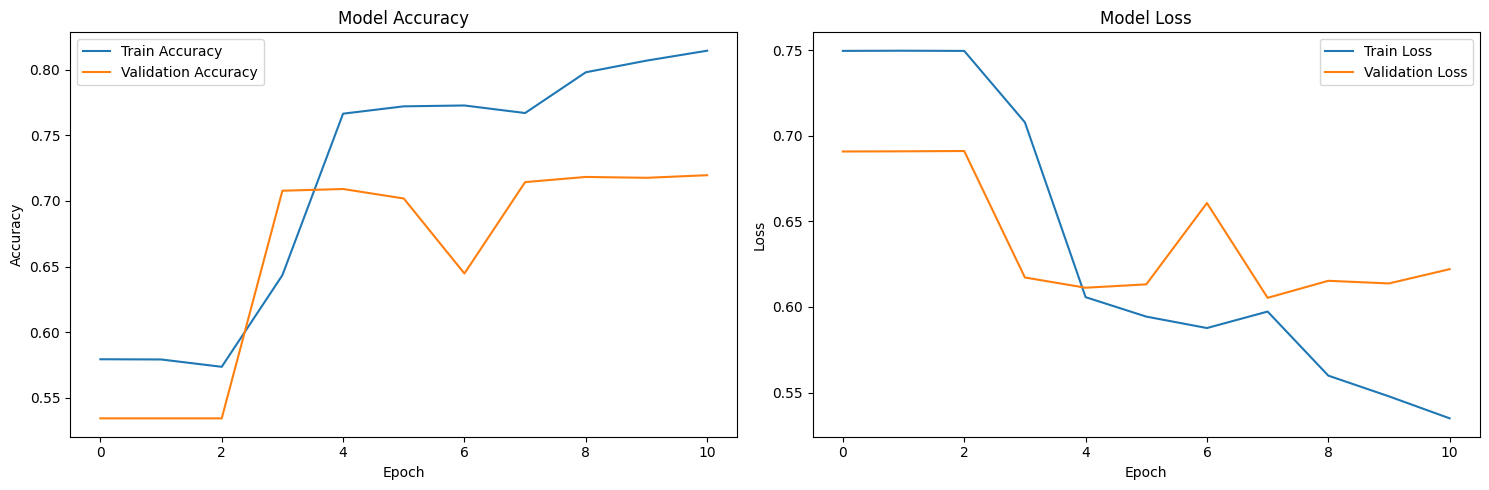

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

Training Set Performance Metrics:
 Dataset  Accuracy  Precision   Recall  F1 Score  ROC AUC
Training  0.799947   0.807746 0.701315  0.750777 0.825406

Training Set Classification Report:
              precision    recall  f1-score   support

Non-Disaster       0.80      0.87      0.83      4342
    Disaster       0.81      0.70      0.75      3271

    accuracy                           0.80      7613
   macro avg       0.80      0.79      0.79      7613
weighted avg       0.80      0.80      0.80      7613

102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

Test Set Prediction Distribution:
target
0    2113
1    1150
Name: count, dtype: int64

Sample Test Predictions:
  id  target
1685       1
1377       0
7038       0
9904       0
 343       0

Test predictions saved to 'test_predictions.csv'


In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import pandas as pd

def generate_model_report(model, history, train_padded, train_target, test_padded):
    """
    Generate a comprehensive evaluation report for the LSTM model
    
    Args:
        model: Trained Keras model
        history: Training history object
        train_padded: Padded training sequences
        train_target: Training labels
        test_padded: Padded test sequences
    """
    
    # Create a figure for all plots
    plt.figure(figsize=(15, 5))
    
    # 1. Plot training history (only training metrics available)
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    if 'val_accuracy' in history.history:
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    if 'val_loss' in history.history:
        plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    # 2. Generate predictions for training set (for evaluation)
    train_pred = (model.predict(train_padded) > 0.5).astype("int32")
    
    # 3. Metrics table (training only)
    metrics = {
        'Dataset': ['Training'],
        'Accuracy': [accuracy_score(train_target, train_pred)],
        'Precision': [precision_score(train_target, train_pred)],
        'Recall': [recall_score(train_target, train_pred)],
        'F1 Score': [f1_score(train_target, train_pred)],
        'ROC AUC': [roc_auc_score(train_target, model.predict(train_padded))]
    }
    
    metrics_df = pd.DataFrame(metrics)
    print("\nTraining Set Performance Metrics:")
    print(metrics_df.to_string(index=False))
    
    # 4. Classification report (training only)
    print("\nTraining Set Classification Report:")
    print(classification_report(train_target, train_pred, target_names=['Non-Disaster', 'Disaster']))
    
    # 5. Generate predictions for test set
    test_pred = (model.predict(test_padded) > 0.5).astype("int32")
    test_pred_proba = model.predict(test_padded)
    
    # 6. Save test predictions
    test_results = pd.DataFrame({
        'id': test['id'],
        'target': test_pred.flatten()
    })
    
    # Class distribution in test predictions
    print("\nTest Set Prediction Distribution:")
    print(test_results['target'].value_counts())
    
    # Sample predictions
    print("\nSample Test Predictions:")
    print(test_results.sample(5).to_string(index=False))
    
    # Save full results
    test_results.to_csv('test_submission.csv', index=False)
    print("\nTest predictions saved to 'test_predictions.csv'")
    return test_results

# Generate the report
test_predictions = generate_model_report(
    model=model,
    history=history,
    train_padded=train_padded,
    train_target=train['target'],
    test_padded=test_padded
)

## Model Saving

In [49]:
model.save('../models/lstm_model.keras')

## Overall Model Performance

- The model achieves 79.9% accuracy on the training set, indicating it has learned to distinguish between disaster and non-disaster tweets with moderate success

- The ROC AUC of 0.825 suggests the model has fair discriminatory power (AUC > 0.7 is generally considered acceptable)

## Kaggle Results

The results of the model were submitted to Kaggle, and the performance is visualized in the following image

![keggle results](kaggle_results.png "Title")